# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [11]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [12]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [13]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [16]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_types = to_data[['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']]
dwelling_types = dwelling_types.groupby('year').sum()
dwelling_types.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [17]:
# Save the dataframe as a csv file
dwelling_types.to_csv('Data/grouped_dwelling_types_by1.csv')

In [21]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    # allocate a figure area
    fig = plt.figure()
    # create abar plot
    bar_chart = data.plot.bar(color=color)
    bar_chart.set_xlabel(xlabel, fontsize=18)
    bar_chart.set_ylabel(ylabel, fontsize=18)
    bar_chart.set_title(title, fontsize=12, fontweight="bold")    
    plt.show()
    plt.close(fig)

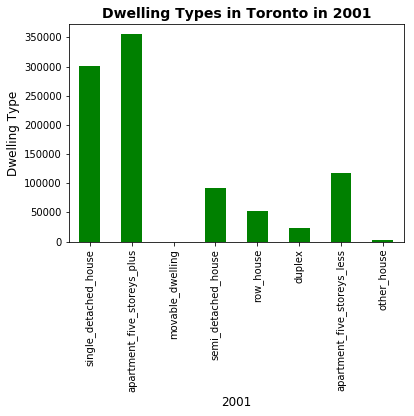

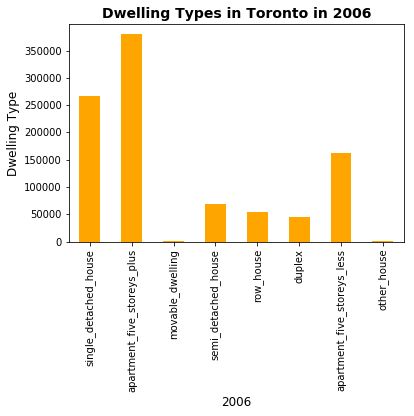

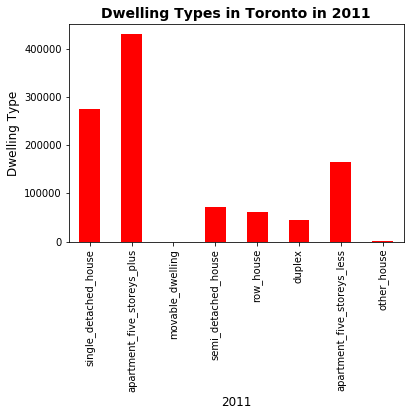

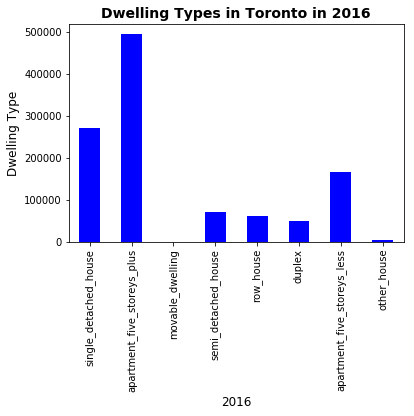

In [24]:
# Create a bar chart per year to show the number of dwelling types
# Bar chart for 2001
create_bar_chart(dwelling_types.loc[2001], 'Dwelling Types in Toronto in 2001', '2001', 'Dwelling Type', 'green')
# Bar chart for 2006
create_bar_chart(dwelling_types.loc[2006], 'Dwelling Types in Toronto in 2006', '2006', 'Dwelling Type', 'orange')
# # Bar chart for 2011
create_bar_chart(dwelling_types.loc[2011], 'Dwelling Types in Toronto in 2011', '2011', 'Dwelling Type', 'red')
# # Bar chart for 2016
create_bar_chart(dwelling_types.loc[2016], 'Dwelling Types in Toronto in 2016', '2016', 'Dwelling Type', 'blue')

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [29]:
# Calculate the average monthly shelter costs for owned and rented dwellings
s_data = (to_data[["shelter_costs_owned", "shelter_costs_rented"]].groupby([to_data.index]).mean())
s_data

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [38]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    fig = plt.figure()
    line_chart = data.plot.line(color=color)
    line_chart.set_xlabel(xlabel, fontsize=15)
    line_chart.set_ylabel(ylabel, fontsize=15)
    line_chart.set_title(title, fontsize=18, fontweight="bold")    
    plt.show()
    plt.close(fig)

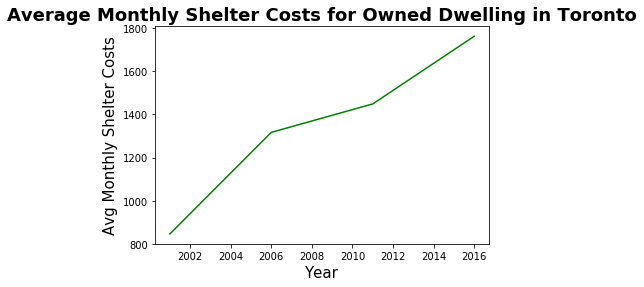

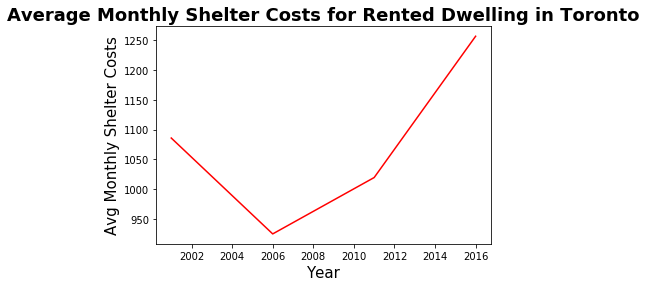

In [39]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(s_data.loc[:,'shelter_costs_owned'], 'Average Monthly Shelter Costs for Owned Dwelling in Toronto', 'Year', 'Avg Monthly Shelter Costs', 'green')
# Line chart for rented dwellings
create_line_chart(s_data.loc[:,'shelter_costs_rented'], 'Average Monthly Shelter Costs for Rented Dwelling in Toronto', 'Year', 'Avg Monthly Shelter Costs', 'red')


## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [41]:
# Calculate the average house value per year
average_house_value = to_data["average_house_value"].groupby([to_data.index]).mean()
average_house_value

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

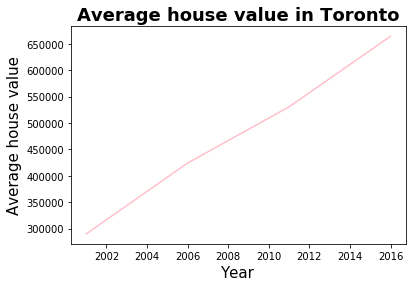

In [44]:
create_line_chart(average_house_value, "Average house value in Toronto", "Year", "Average house value", "pink")

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [47]:
# Create a new DataFrame with the mean house values by neighbourhood per year
av_house_value = to_data[["neighbourhood", "average_house_value"]].groupby(["neighbourhood",to_data.index]).mean()
av_house_value.head()

average_house_value
neighbourhood                year                     
Agincourt North              2001             200388.0
                             2006             293140.0
                             2011             366667.0
                             2016             459051.0
Agincourt South-Malvern West 2001             203047.0
...                                                ...
York University Heights      2016             425769.0
Yorkdale-Glen Park           2001             261784.0
                             2006             382954.0
                             2011             479009.0
                             2016             599698.0

[560 rows x 1 columns]

In [53]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
from panel.interact import interact
from panel import widgets
pn. extension
import hvplot.pandas
av_house_value.hvplot.line(
    "year",
    "average_house_value",
    xlabel="Year",
    ylabel="Avg. House Value",
    groupby="neighbourhood",).opts(yformatter = "%.0f", frame_height = 250)

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [60]:
# Fetch the data of all dwelling types per year
house_type = list(to_data.columns)[:-3]
dwelling_type_per_neighbourhood_per_year = to_data[house_type]
dwelling_type_per_neighbourhood_per_year = dwelling_type_per_neighbourhood.groupby(["neighbourhood",to_data.index]).sum()
dwelling_type_per_neighbourhood_per_year

,,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,year,,,,,,,,,,,
Agincourt North,2001,13740,7790,10,3455,5625,2050,2190,40,1319246,4436,3934
Agincourt South-Malvern West,2001,11590,8720,5,1500,1825,2095,2515,130,1336756,4525,3940
Alderwood,2001,11615,1210,5,2015,305,1210,2010,5,1711690,4667,4013
Annex,2001,3005,28940,5,5500,2455,1420,18420,335,2987908,6771,5261
Banbury-Don Mills,2001,14290,21555,5,1095,2505,130,5360,0,2448156,5854,4971
...,...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,2016,4225,4945,0,3970,1195,1300,7515,70,2263906,5563,4069
Yonge-Eglinton,2016,5875,6555,0,1880,135,1315,5540,25,3238983,7198,5391
Yonge-St.Clair,2016,2260,15795,0,1700,850,690,5235,25,3252881,6723,5476


In [63]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
dwelling_type_per_neighbourhood.hvplot.bar(
    "year",
    ["single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"],
    xlabel="Year",
    ylabel="Dwelling Type Units",
    groupby="neighbourhood",
    rot=90).opts(frame_height = 350)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [65]:
# Getting the data from the top 10 expensive neighbourhoods
top_10_expensive_neighbourhoods = to_data[["neighbourhood", "average_house_value"]].groupby(["neighbourhood"]).mean()
top_10_expensive_neighbourhoods = top_10_expensive_neighbourhoods.sort_values("average_house_value", ascending=False).nlargest(10, "average_house_value")
top_10_expensive_neighbourhoods

,average_house_value
neighbourhood,
Bridle Path-Sunnybrook-York Mills,1526485.75
Forest Hill South,1195992.50
Lawrence Park South,1094027.75
Rosedale-Moore Park,1093640.00
St.Andrew-Windfields,999107.00
Casa Loma,981064.25
Bedford Park-Nortown,930415.25
Forest Hill North,851680.50
Kingsway South,843234.25


In [69]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_expensive_neighbourhoods.hvplot.bar(x="neighbourhood", y='average_house_value', xlabel = "Neighbourhood", ylabel = "Average House Value", rot=90, frame_height = 250,frame_width = 500,title = "Top 10 Most Expensive Neighbourhoods")


:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [70]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [73]:
# Calculate the mean values for each neighborhood
mean_value_for_neighbourhood = to_data[["neighbourhood", "average_house_value"]].groupby(["neighbourhood"]).mean()
mean_value_for_neighbourhood.head(15)

,average_house_value
neighbourhood,
Agincourt North,329811.50
Agincourt South-Malvern West,334189.00
Alderwood,427922.50
Annex,746977.00
Banbury-Don Mills,612039.00
Bathurst Manor,501576.75
Bay Street Corridor,423653.50
Bayview Village,539258.75
Bayview Woods-Steeles,565413.50


In [102]:
df_neighbourhood_locations.set_index("neighbourhood", inplace=True)

In [104]:
# Join the average values with the neighbourhood locations
average_values_neighbourhood_locations = pd.concat([df_neighbourhood_locations, mean_value_for_neighbourhood], axis = 1 ,join= 'inner')
average_values_neighbourhood_locations = average_values_neighbourhood_locations.drop_duplicates().dropna()
average_values_neighbourhood_locations.head()

,lat,lon,average_house_value
neighbourhood,,,
Agincourt North,43.805441,-79.266712,329811.5
Agincourt South-Malvern West,43.788658,-79.265612,334189.0
Alderwood,43.604937,-79.541611,427922.5
Annex,43.671585,-79.404001,746977.0
Banbury-Don Mills,43.737657,-79.349718,612039.0


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

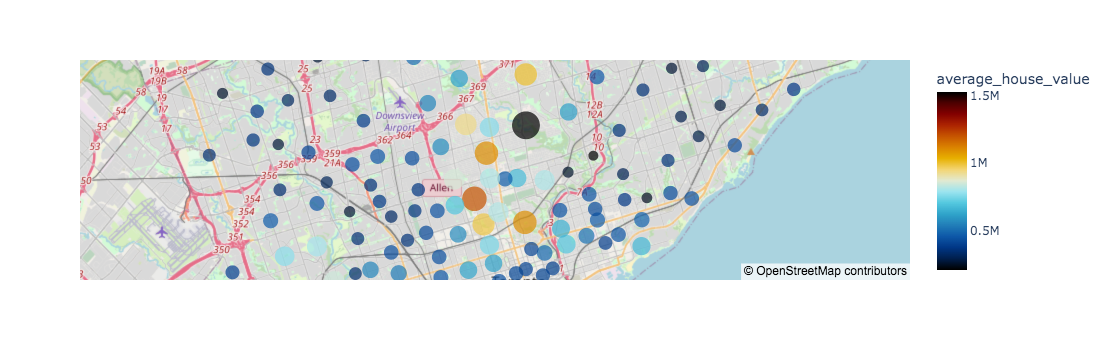

In [105]:
# Create a scatter mapbox to analyze neighbourhood info
map_plot = px.scatter_mapbox(
    average_values_neighbourhood_locations,
    lat = "lat",
    lon = "lon",
    size = "average_house_value",
    color = "average_house_value",
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom = 10)

# Display the map
map_plot = map_plot.update_mapboxes(style='open-street-map')
map_plot.show()


- - -